In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
#import data
path = "../data/wine-data/winequality-red.csv"
df = pd.read_csv(path, sep = ';')

#replace quality with binary class
df["class"] = [1 if i > 5 else 0 for i in df["quality"]]
df = df.drop(columns = ["quality"])

#split data into features and target
y = df['class']
features = df.drop(columns = ['class'])

#transform data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(features)


#split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 99)

## Logistic Regression without Regularization


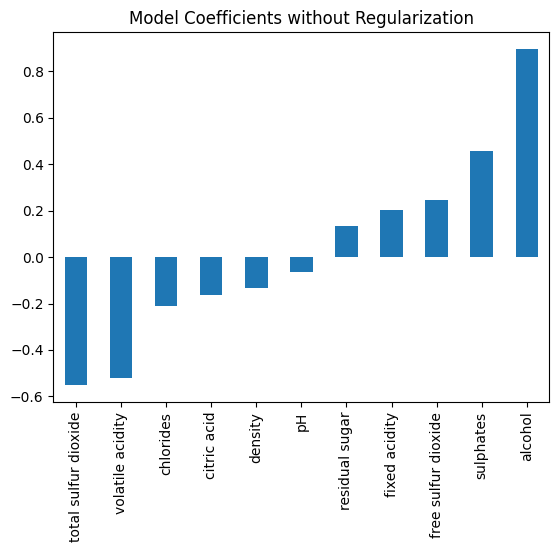

F1 score on training data:  0.7727598566308242
F1 score on testing data:  0.7266666666666667


In [21]:
#define classifier without regularization
from sklearn.linear_model import LogisticRegression
clf_noreg = LogisticRegression(penalty=None, max_iter=1000) #penalty=None means no regularization
clf_noreg.fit(X_train, y_train)

#plot coefficients
coef = clf_noreg.coef_.ravel() #ravel() flattens the array
predictors = features.columns

coef = pd.Series(coef, predictors).sort_values()
coef.plot(kind = 'bar', title = 'Model Coefficients without Regularization')
plt.show()

#evaluate model using f1 score
from sklearn.metrics import f1_score

y_pred_train = clf_noreg.predict(X_train) #predict on train data
y_pred_test = clf_noreg.predict(X_test) #predict on test data
print("F1 score on training data: ", f1_score(y_train, y_pred_train))
print("F1 score on testing data: ", f1_score(y_test, y_pred_test))

## L2 Regularization

In [22]:
#train model with L2 regularization
clf_l2 = LogisticRegression(max_iter=1000) #penalty='l2' is default
clf_l2.fit(X_train, y_train)

#evaluate model using f1 score
y_pred_train_l2 = clf_l2.predict(X_train) #predict on train data
y_pred_test_l2 = clf_l2.predict(X_test) #predict on test data
print("F1 score on training data l2: ", f1_score(y_train, y_pred_train_l2))
print("F1 score on testing data l2: ", f1_score(y_test, y_pred_test_l2))

#observe f1 score remains the same for regularized model and non-regularized model
#this is because the the constraint boundary for the regularization we performed is 
#large enough to hold the original loss function minimum
#thus rendering our model the same as the unregularized one.


F1 score on training data l2:  0.7727598566308242
F1 score on testing data l2:  0.7266666666666667


Observe f1 score remains the same for regularized model and non-regularized model
this is because the the constraint boundary for the regularization we performed is 
large enough to hold the original loss function minimum
thus rendering our model the same as the unregularized one.

Scikit defval for C is 1. For more regularization we will need to explore values less than one.

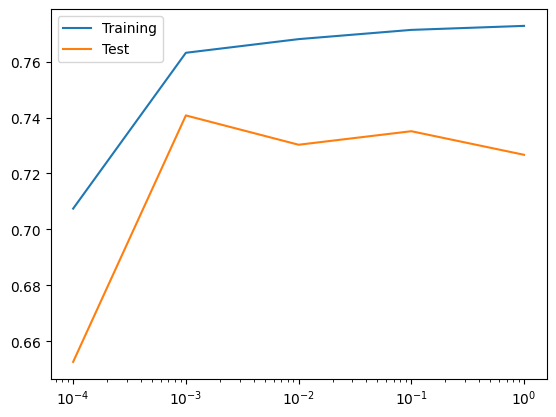

In [23]:
#define array
training_array = []
test_array = []
C_array = [0.0001, 0.001, 0.01, 0.1, 1]

for x in C_array:
    clf = LogisticRegression(C=x)
    clf.fit(X_train, y_train)
    y_pred_test = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    test_array.append(f1_score(y_test, y_pred_test))
    training_array.append(f1_score(y_train, y_pred_train))

#evaluate model using f1 score
plt.plot(C_array,training_array, label="Training")
plt.plot(C_array,test_array, label="Test")
plt.xscale('log')
plt.legend()
plt.show()

## Hyperameter Tuning for L2 Regularization

In [31]:
from sklearn.model_selection import GridSearchCV

#get 100 values between 10^-2 and 10^-4
C_array = np.logspace(-4, -2, 100)

#create dict input for GridsearchCV
tuning_c = {"C":C_array}

#define grid search model
clf_gs = LogisticRegression()
gs = GridSearchCV(clf_gs, param_grid=tuning_c, scoring="f1")

#fit to training date
gs.fit(X_train, y_train)

#get best params and best score
best_c = gs.best_params_
best_score = gs.best_score_

In [32]:
print(best_c)
print(best_score)

{'C': 0.0019630406500402726}
0.7723336222647887


In [34]:
#define a new classifier based on best C value
clf_best_ridge = LogisticRegression(C=best_c["C"], max_iter=1000)

#fit classifier to test data 
clf_best_ridge.fit(X_train, y_train)

#obtain f1 score
y_pred_test = clf_best_ridge.predict(X_test)
best_ridge_f1 = f1_score(y_test, y_pred_test)

best_ridge_f1

0.7407407407407408

## Feature Selection using L1 Regularization

In [36]:
from sklearn.linear_model import LogisticRegressionCV

#define a cross-validated classifier
C_array = np.logspace(-2, 2, 100)
clf_l1 = LogisticRegressionCV(Cs=C_array,
                              cv=5, 
                              penalty="l1", 
                              solver="liblinear",
                              scoring="f1")
#fit the model 
clf_l1.fit(X, y) #No train-test-validation like before

LogisticRegressionCV(Cs=array([1.00000000e-02, 1.09749877e-02, 1.20450354e-02, 1.32194115e-02,
       1.45082878e-02, 1.59228279e-02, 1.74752840e-02, 1.91791026e-02,
       2.10490414e-02, 2.31012970e-02, 2.53536449e-02, 2.78255940e-02,
       3.05385551e-02, 3.35160265e-02, 3.67837977e-02, 4.03701726e-02,
       4.43062146e-02, 4.86260158e-02, 5.33669923e-02, 5.85702082e-02,
       6.42807312e-02, 7.05...
       1.70735265e+01, 1.87381742e+01, 2.05651231e+01, 2.25701972e+01,
       2.47707636e+01, 2.71858824e+01, 2.98364724e+01, 3.27454916e+01,
       3.59381366e+01, 3.94420606e+01, 4.32876128e+01, 4.75081016e+01,
       5.21400829e+01, 5.72236766e+01, 6.28029144e+01, 6.89261210e+01,
       7.56463328e+01, 8.30217568e+01, 9.11162756e+01, 1.00000000e+02]),
                     cv=5, penalty='l1', scoring='f1', solver='liblinear')

In [38]:
print(f"Best C value: {clf_l1.C_}")
print(f"Coefficients of best C: {clf_l1.coef_}")

Best C value: [0.25950242]
Coefficients of best C: [[ 0.1160676  -0.55615578 -0.1723095   0.03123738 -0.17341613  0.20068728
  -0.50607009  0.         -0.07067566  0.43227881  0.94097337]]


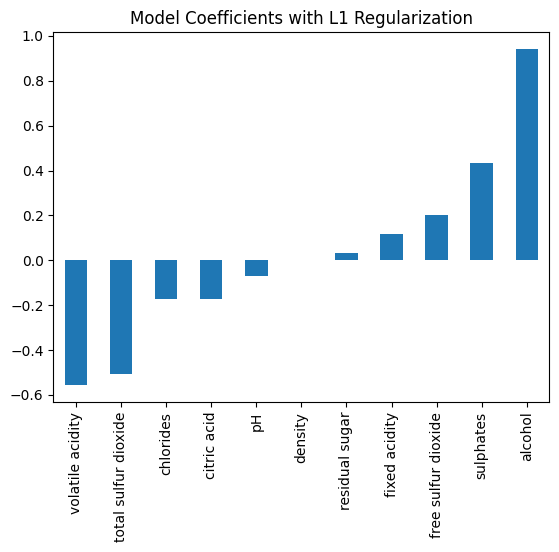

In [39]:
#plot the new coefficients
coef_l1 = clf_l1.coef_.ravel() #ravel() flattens the array
coef = pd.Series(coef_l1, predictors).sort_values()
coef.plot(kind = 'bar', title = 'Model Coefficients with L1 Regularization')
plt.show()

Note that density has been reduced to zero. By eliminating a feature, L1 regularization works as a feature selection method in this way. 